In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [3]:
# 한글 깨짐 방지
# 원리는 색상 폰트들에서 한글을 인식하는 폰트로 바꾸어주는 구조
def font_kor_fixed() :
    from matplotlib import font_manager, rc
    import platform 

    if platform.system() == 'Windows': 
        path = 'c:/Windows/Fonts/malgun.ttf'
        font_name = font_manager.FontProperties(fname=path).get_name()
        rc('font', family=font_name)
    elif platform.system() == 'Darwin':
        rc('font', family='AppleGothic')
    else: 
        print('Check your OS system')

font_kor_fixed()

In [4]:
# districtsinglehousehold excel파일 불러오기 (변수명 data_03)
data_03 = pd.read_excel('districtsinglehousehold.xlsx')

# data_03 info로 데이터 값 확인
data_03.info()

# data_03에서 지역, 2017, 2021 컬럼만 가져오고, 0번째 행(전국) 삭제
data_03 = data_03[['지역' , 2017 ,2021]].drop([0])

# data_03에서 '지역'컬럼 'district'로 컬럼명 변경
data_03 = data_03.rename(columns = {'지역' : 'district'})

# data_03 인덱스 초기화 후 정렬
data_03.reset_index(drop=True)
data_03

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18 entries, 0 to 17
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  18 non-null     int64 
 1   지역          18 non-null     object
 2   2017        18 non-null     int64 
 3   2018        18 non-null     int64 
 4   2019        18 non-null     int64 
 5   2020        18 non-null     int64 
 6   2021        18 non-null     int64 
dtypes: int64(6), object(1)
memory usage: 1.1+ KB


,district,2017,2021
1,서울특별시,1180540,1489893
2,부산광역시,388899,487362
3,대구광역시,259525,326866
4,인천광역시,266434,355657
5,광주광역시,171424,212385
6,대전광역시,188136,240932
7,울산광역시,107497,133061
8,세종특별자치시,31472,45706
9,경기도,1124541,1543100
10,강원도,199645,245012


In [5]:
# 2017년 1인 가구 수 (단위 : 만) 단위변환

data_03_l2017 = data_03[2017]/10000
data_03_l2017 = data_03_l2017.astype(int)
data_03_l2017

1     118
2      38
3      25
4      26
5      17
6      18
7      10
8       3
9     112
10     19
11     19
12     25
13     22
14     23
15     34
16     37
17      6
Name: 2017, dtype: int32

In [6]:
# 2021년 1인 가구 수 (단위 : 만) 단위변환

data_03_l2021 = data_03[2021]/10000
data_03_l2021 = data_03_l2021.astype(int)
data_03_l2021

1     148
2      48
3      32
4      35
5      21
6      24
7      13
8       4
9     154
10     24
11     25
12     32
13     27
14     27
15     41
16     45
17      8
Name: 2021, dtype: int32

In [7]:
# 1인 가구 비율 2021년 - 2017년 값 구하기
single_01 = pd.read_excel('singlehousehold_district.xlsx' ,usecols = 'A:F')
single_01
single_01 = single_01.rename(columns = {'년도' : '지역' , 2017 : '2017' , 2018 : '2018' , 2019 : '2019' , 2020 : '2020' , 2021 : '2021'})

pop_per_01 = single_01[['지역' , '2017' , '2021']].loc[1:]
for i in range(1,18) :
    pop_per_01 = pop_per_01.rename(index = { i : i-1})
    
percent_differ = pop_per_01['2021'] - pop_per_01['2017']
percent_differ = round(percent_differ , 2)
percent_differ

0     5.8
1     5.3
2     5.3
3     5.3
4     4.7
5     6.1
6     4.4
7     1.3
8     4.8
9     4.1
10    5.3
11    4.7
12    4.5
13    3.7
14    4.1
15    4.1
16    4.1
dtype: float64

In [8]:
# 1인 가구 수 증가 비율 2021년 - 2017년 값 구하기
percent_differ = 100 - round(data_03_l2017 / data_03_l2021 * 100 , 1)
percent_differ = round(percent_differ , 2)
percent_differ

1     20.3
2     20.8
3     21.9
4     25.7
5     19.0
6     25.0
7     23.1
8     25.0
9     27.3
10    20.8
11    24.0
12    21.9
13    18.5
14    14.8
15    17.1
16    17.8
17    25.0
dtype: float64

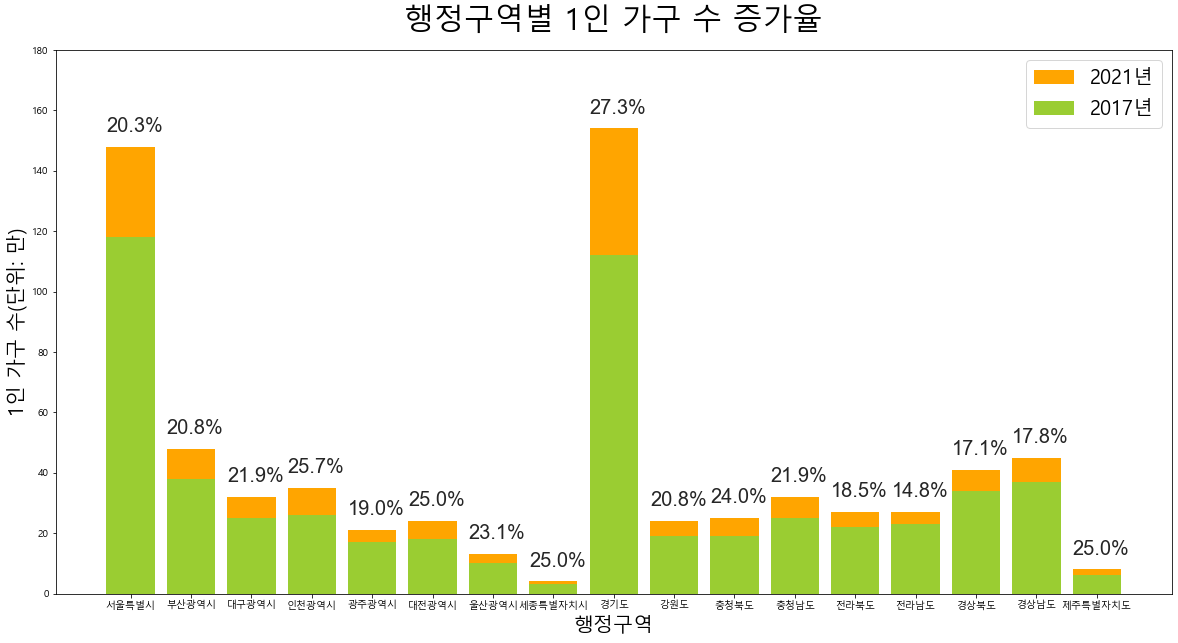

In [9]:
# 한글 깨짐 방지
font_kor_fixed()

# 바 그래프 꾸미기
# seaborn 패키지 : 차트 꾸밈 패키지
import seaborn as sns

## 그래프 크기 조절
plt.figure(figsize = (20, 10))

## 그래프 내용 설정 및 색상 변경  
x = np.arange(17)
district = list(data_03['district'])
values = list(data_03_l2017)
values_02 = list(data_03_l2021)

p1 = plt.bar(x, values_02 , color = '#FFA500')
p2 = plt.bar(x, values, color = '#9ACD32')

plt.xticks(x, district , size = 10)

## 그래프 타이틀, x축, y축 이름 달기
plt.title('행정구역별 1인 가구 수 증가율', fontsize=30 , pad = 20)
plt.xlabel('행정구역', fontsize = 20)
plt.ylabel('1인 가구 수(단위: 만)', fontsize = 20 , rotation = 90)

## y축 값 설정
plt.ylim(0 , 180)
plt.ticklabel_format(axis='y',useOffset=False, style='plain')

# 범례
plt.legend(('2021년' , '2017년') , fontsize = 20)

# background color
# 아래는 내장된 색상 코드
# 'tab:blue', 'tab:orange', 'tab:green', 'tab:red', 'tab:purple' 
# 'tab:brown', 'tab:pink', 'tab:gray', 'tab:olive', 'tab:cyan'
# hex 색상 코드도 사용 가능
sns.set(rc={'axes.facecolor':'white', 'figure.facecolor':'white'})
x_01 = np.arange(17)

# 증가률 표시하기
for i in range(len(percent_differ)):
    label  = str(percent_differ.iloc[i])
    x      = x_01[i]
    y      = list(data_03_l2021)[i]
    plt.text(x - 0.4, y + 5, label+'%', fontsize = 20)
## 그래프 저장
# plt.show()
plt.savefig('project_03_ppt_04.png')



In [10]:
# https://jimmy-ai.tistory.com/17 / 참고자료  -  plt.xticks 

In [11]:
# https://www.statology.org/seaborn-background-color/ 참고자료

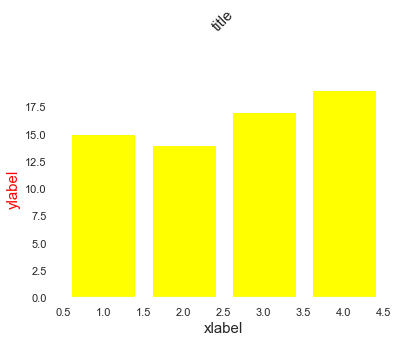

In [12]:
import matplotlib.pyplot as plt

x = [1, 2, 3, 4]
y = [15, 14, 17, 19]
plt.bar(x, y, color = 'yellow')
plt.xlabel('xlabel', size = 15) # x축 제목 설정
plt.ylabel('ylabel', size = 15, color = 'red') #y축 제목 설정, 빨간 글씨
plt.title('title', size= 15, rotation = 45 , pad = 50 ) # 차트 제목 설정, 45도 회전 , title과 그래프 간격
plt.show()